In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [10]:
df = pd.read_csv('credit_score.csv')

In [11]:
# Explore dataset structure
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1000, 87)

Column names:
['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME', 'R_HOUSING_SAVINGS', 'R_

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [12]:
# Select relevant columns
# Features: income, debt, savings, credit_score, and CAT_* columns
# Target: Default

cat_columns = [col for col in df.columns if col.startswith('CAT_')]
feature_columns = ['INCOME', 'DEBT', 'SAVINGS', 'CREDIT_SCORE'] + cat_columns
target_column = 'DEFAULT'

print(f"Selected features ({len(feature_columns)}): {feature_columns}")
print(f"\nTarget: {target_column}")

# Create feature matrix and target vector
X = df[feature_columns]
y = df[target_column]

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts(normalize=True)}")

Selected features (10): ['INCOME', 'DEBT', 'SAVINGS', 'CREDIT_SCORE', 'CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

Target: DEFAULT

X shape: (1000, 10)
y shape: (1000,)

Target distribution:
DEFAULT
0    0.716
1    0.284
Name: proportion, dtype: float64


In [13]:
# Check CAT_GAMBLING values before conversion
print("CAT_GAMBLING unique values:")
print(df['CAT_GAMBLING'].unique())
print(f"\nValue counts:\n{df['CAT_GAMBLING'].value_counts()}")

CAT_GAMBLING unique values:
['High' 'No' 'Low']

Value counts:
CAT_GAMBLING
No      620
High    264
Low     116
Name: count, dtype: int64


In [14]:
# Convert CAT_GAMBLING from string to numeric (categorical encoding)
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original dataframe
X = X.copy()

# Initialize label encoder
le = LabelEncoder()

# Convert CAT_GAMBLING to numeric categories
X['CAT_GAMBLING'] = le.fit_transform(X['CAT_GAMBLING'])

print("CAT_GAMBLING after conversion:")
print(f"Unique values: {sorted(X['CAT_GAMBLING'].unique())}")
print(f"\nMapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print(f"\nValue counts:\n{X['CAT_GAMBLING'].value_counts().sort_index()}")

CAT_GAMBLING after conversion:
Unique values: [np.int64(0), np.int64(1), np.int64(2)]

Mapping: {'High': np.int64(0), 'Low': np.int64(1), 'No': np.int64(2)}

Value counts:
CAT_GAMBLING
0    264
1    116
2    620
Name: count, dtype: int64


In [15]:
# Check for missing values
print("Missing values:")
print(X.isnull().sum())
print(f"\nTarget missing values: {y.isnull().sum()}")

Missing values:
INCOME                 0
DEBT                   0
SAVINGS                0
CREDIT_SCORE           0
CAT_GAMBLING           0
CAT_DEBT               0
CAT_CREDIT_CARD        0
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
dtype: int64

Target missing values: 0


In [16]:
# Split data into train (60%), validation (20%), and test (20%)
from sklearn.model_selection import train_test_split

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 75% of temp is train (60% of total), 25% of temp is val (20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTrain target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"\nValidation target distribution:\n{y_val.value_counts(normalize=True)}")
print(f"\nTest target distribution:\n{y_test.value_counts(normalize=True)}")

Train set: 600 samples (60.0%)
Validation set: 200 samples (20.0%)
Test set: 200 samples (20.0%)

Train target distribution:
DEFAULT
0    0.716667
1    0.283333
Name: proportion, dtype: float64

Validation target distribution:
DEFAULT
0    0.715
1    0.285
Name: proportion, dtype: float64

Test target distribution:
DEFAULT
0    0.715
1    0.285
Name: proportion, dtype: float64


In [17]:
X_train

,INCOME,DEBT,SAVINGS,CREDIT_SCORE,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS
90,163513,758105,252702,612,2,1,0,0,1,0
272,169469,734365,550774,636,2,1,1,0,1,0
432,10604,0,5302,660,2,0,0,0,1,0
597,17013,234397,17013,464,0,1,0,0,1,0
178,230465,642010,362160,627,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
911,68967,572426,55174,581,2,1,0,0,1,0
935,110735,230698,387572,603,0,1,0,1,1,0
452,158440,1499903,464759,557,0,1,1,0,1,0
752,273858,1200762,252792,680,2,1,0,1,1,0


In [18]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Train model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete!")

Training Random Forest model...
Training complete!


In [19]:
# Evaluate on validation set
y_val_pred = rf_model.predict(X_val)
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

print("="*60)
print("VALIDATION SET PERFORMANCE")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_val_pred_proba):.4f}")
print(f"\nClassification Report:\n{classification_report(y_val, y_val_pred)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_val, y_val_pred)}")

VALIDATION SET PERFORMANCE

Accuracy: 0.7200
ROC-AUC Score: 0.6505

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       143
           1       0.52      0.21      0.30        57

    accuracy                           0.72       200
   macro avg       0.63      0.57      0.56       200
weighted avg       0.68      0.72      0.68       200


Confusion Matrix:
[[132  11]
 [ 45  12]]


In [23]:
# Evaluate on test set
y_test_pred = rf_model.predict(X_test)
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("="*60)
print("TEST SET PERFORMANCE")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_test_pred_proba):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_test_pred)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

TEST SET PERFORMANCE

Accuracy: 0.7050
ROC-AUC Score: 0.6462

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       143
           1       0.46      0.21      0.29        57

    accuracy                           0.70       200
   macro avg       0.60      0.56      0.55       200
weighted avg       0.66      0.70      0.66       200


Confusion Matrix:
[[129  14]
 [ 45  12]]


Top 10 Most Important Features:
               feature  importance
3         CREDIT_SCORE    0.354837
1                 DEBT    0.204997
0               INCOME    0.188360
2              SAVINGS    0.162632
4         CAT_GAMBLING    0.031508
6      CAT_CREDIT_CARD    0.027460
9       CAT_DEPENDENTS    0.014464
7         CAT_MORTGAGE    0.013411
5             CAT_DEBT    0.002330
8  CAT_SAVINGS_ACCOUNT    0.000000


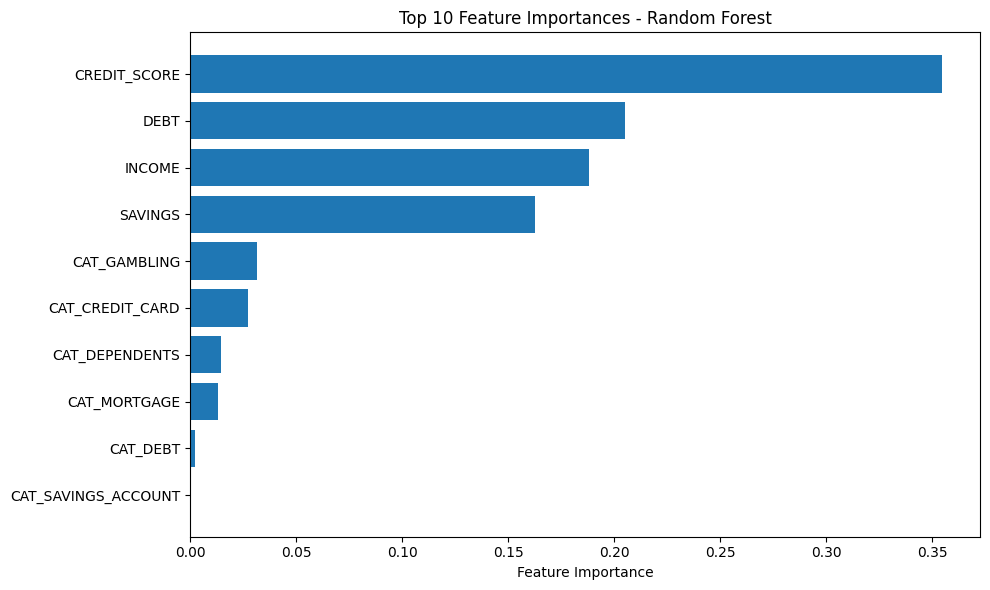

In [21]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(10)[::-1], 
         feature_importance['importance'].head(10)[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [24]:
# Optional: Try Gradient Boosting (XGBoost or LightGBM if available)
# Uncomment and run if you want to compare with other tree-based models

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

print("Training Gradient Boosting model...")
gb_model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_gb = gb_model.predict(X_val)
y_val_pred_proba_gb = gb_model.predict_proba(X_val)[:, 1]

print("\nGradient Boosting - Validation Set Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_gb):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_val_pred_proba_gb):.4f}")

Training Gradient Boosting model...

Gradient Boosting - Validation Set Performance:
Accuracy: 0.6600
ROC-AUC Score: 0.6023
